ROC Curve

In [ ]:

# AUC-ROC Curves and Multiclass Classification Tutorial
# =====================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    classification_report, confusion_matrix,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import LabelBinarizer, label_binarize
from sklearn.multiclass import OneVsRestClassifier




from sklearn.svm import SVC




import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



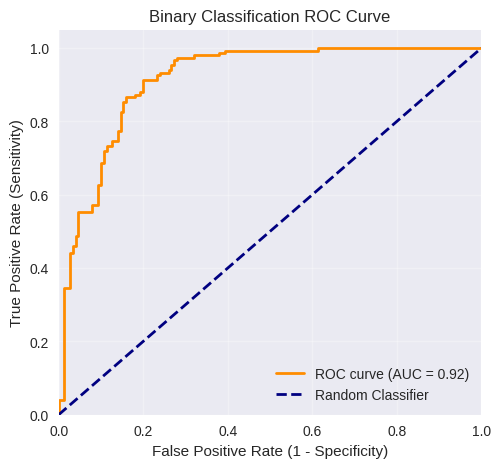

In [ ]:
# Generate synthetic binary classification data
X_binary, y_binary = make_classification(
    n_samples=1000,  n_informative=10,
    n_redundant=10, n_classes=2, random_state=42
)

# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# Train a logistic regression model
lr_binary = LogisticRegression(random_state=42)
lr_binary.fit(X_train_bin, y_train_bin)

# Get prediction probabilities
y_prob_binary = lr_binary.predict_proba(X_test_bin)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Binary Classification ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

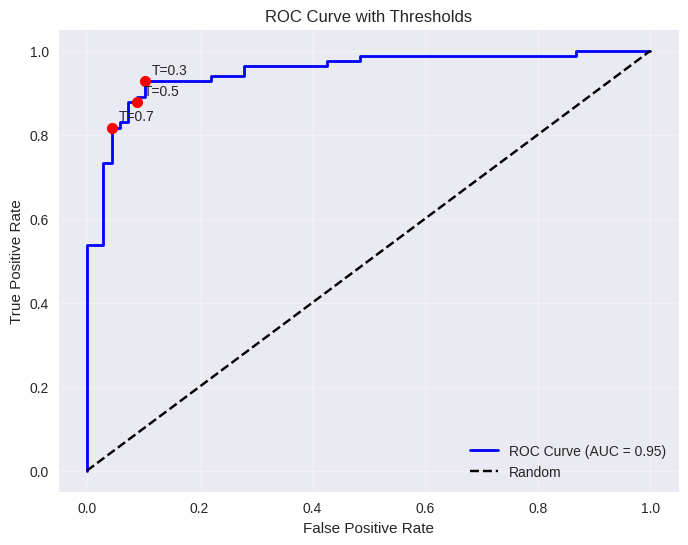

Threshold 0.3: TPR=0.93, FPR=0.10
Threshold 0.5: TPR=0.88, FPR=0.09
Threshold 0.7: TPR=0.78, FPR=0.04


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Generate data and train model
X, y = make_classification(n_samples=500, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with threshold points
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b-', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Mark specific threshold points
thresholds_to_show = [0.3, 0.5, 0.7]
for thresh in thresholds_to_show:
    idx = np.argmin(np.abs(thresholds - thresh))
    plt.plot(fpr[idx], tpr[idx], 'ro', markersize=8)
    plt.annotate(f'T={thresh}', (fpr[idx], tpr[idx]), xytext=(5, 5),
                textcoords='offset points')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print threshold effects
for thresh in thresholds_to_show:
    y_pred = (y_prob >= thresh).astype(int)
    tp = np.sum((y_test == 1) & (y_pred == 1))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    fn = np.sum((y_test == 1) & (y_pred == 0))
    tn = np.sum((y_test == 0) & (y_pred == 0))
    tpr_calc = tp/(tp+fn)
    fpr_calc = fp/(fp+tn)
    print(f"Threshold {thresh}: TPR={tpr_calc:.2f}, FPR={fpr_calc:.2f}")


2. UNDERSTANDING ROC CURVE COMPONENTS
----------------------------------------
ROC Curve Components Explanation:

Perfect Classifier:
  True Positive Rate (TPR/Sensitivity): 1.000
  False Positive Rate (FPR): 0.000
  False Negative Rate (FNR / Miss Rate): 0.000
  Precision: 1.000

Good Classifier:
  True Positive Rate (TPR/Sensitivity): 0.850
  False Positive Rate (FPR): 0.100
  False Negative Rate (FNR / Miss Rate): 0.150
  Precision: 0.895

Random Classifier:
  True Positive Rate (TPR/Sensitivity): 0.500
  False Positive Rate (FPR): 0.500
  False Negative Rate (FNR / Miss Rate): 0.500
  Precision: 0.500

Poor Classifier:
  True Positive Rate (TPR/Sensitivity): 0.200
  False Positive Rate (FPR): 0.750
  False Negative Rate (FNR / Miss Rate): 0.800
  Precision: 0.211


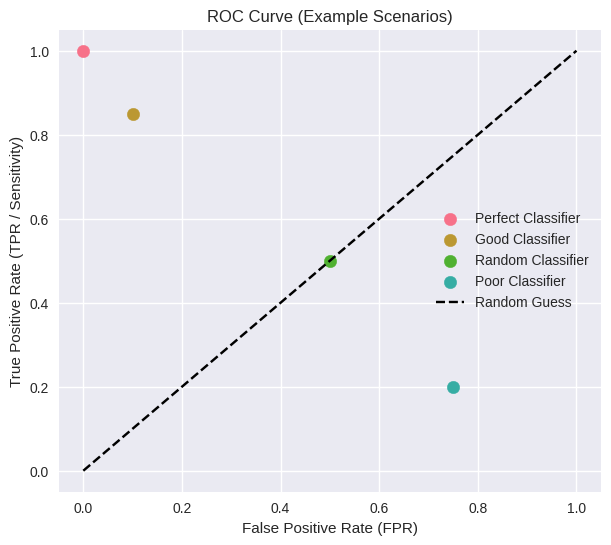

In [ ]:
import matplotlib.pyplot as plt

print("\n2. UNDERSTANDING ROC CURVE COMPONENTS")
print("-" * 40)

def explain_roc_components_and_plot():
    """Function to explain ROC curve components with examples and plot ROC"""

    # Create sample confusion matrix scenarios
    scenarios = {
        'Perfect Classifier': {'TP': 100, 'TN': 100, 'FP': 0, 'FN': 0},
        'Good Classifier': {'TP': 85, 'TN': 90, 'FP': 10, 'FN': 15},
        'Random Classifier': {'TP': 50, 'TN': 50, 'FP': 50, 'FN': 50},
        'Poor Classifier': {'TP': 20, 'TN': 25, 'FP': 75, 'FN': 80}
    }

    print("ROC Curve Components Explanation:")
    print("=" * 35)

    fpr_values = []
    tpr_values = []
    labels = []

    for name, cm in scenarios.items():
        tpr = cm['TP'] / (cm['TP'] + cm['FN'])  # Sensitivity/Recall
        fpr = cm['FP'] / (cm['FP'] + cm['TN'])  # 1 - Specificity
        fnr = cm['FN'] / (cm['TP'] + cm['FN'])  # Miss rate
        precision = cm['TP'] / (cm['TP'] + cm['FP']) if (cm['TP'] + cm['FP']) > 0 else 0

        print(f"\n{name}:")
        print(f"  True Positive Rate (TPR/Sensitivity): {tpr:.3f}")
        print(f"  False Positive Rate (FPR): {fpr:.3f}")
        print(f"  False Negative Rate (FNR / Miss Rate): {fnr:.3f}")
        print(f"  Precision: {precision:.3f}")

        # Store for plotting
        fpr_values.append(fpr)
        tpr_values.append(tpr)
        labels.append(name)

    # Plot ROC curve
    plt.figure(figsize=(7, 6))
    for i in range(len(labels)):
        plt.scatter(fpr_values[i], tpr_values[i], label=labels[i], s=80)

    # Plot diagonal reference line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR / Sensitivity)")
    plt.title("ROC Curve (Example Scenarios)")
    plt.legend()
    plt.grid(True)
    plt.show()

explain_roc_components_and_plot()


# Multiclass classification

In [ ]:

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
print("One-vs-One (OvO) and One-vs-Rest (OvR) Algorithms Demo")
print("=" * 55)

# =============================================================================
# DATASET PREPARATION
# =============================================================================

# Load Iris dataset (3 classes)
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

print(f"Dataset: Iris")
print(f"Classes: {class_names}")
print(f"Samples: {len(X)}")
print(f"Features: {X.shape[1]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


One-vs-One (OvO) and One-vs-Rest (OvR) Algorithms Demo
Dataset: Iris
Classes: ['setosa' 'versicolor' 'virginica']
Samples: 150
Features: 4
Training samples: 105
Test samples: 45


In [ ]:
print("\n" + "="*50)
print("ONE-VS-ONE (OvO) ALGORITHM")
print("="*50)

# Initialize OvO classifier with SVM
ovo_classifier = OneVsOneClassifier(SVC(kernel='rbf', probability=True, random_state=42))

# Train the model
print("Training OvO classifier...")
ovo_classifier.fit(X_train, y_train)

# Check number of binary classifiers created
n_classes = len(np.unique(y_train))
expected_classifiers = n_classes * (n_classes - 1) // 2
print(f"Number of classes: {n_classes}")
print(f"Number of binary classifiers created: {len(ovo_classifier.estimators_)}")
print(f"Expected (n*(n-1)/2): {expected_classifiers}")

# Show which pairs are being classified
print("\nBinary classifiers for each pair:")
pairs = []
for i in range(n_classes):
    for j in range(i+1, n_classes):
        pairs.append((class_names[i], class_names[j]))
        print(f"  Classifier {len(pairs)}: {class_names[i]} vs {class_names[j]}")

# Make predictions
ovo_predictions = ovo_classifier.predict(X_test)


print(f"\nOvO Accuracy: {ovo_classifier.score(X_test, y_test):.4f}")


ONE-VS-ONE (OvO) ALGORITHM
Training OvO classifier...
Number of classes: 3
Number of binary classifiers created: 3
Expected (n*(n-1)/2): 3

Binary classifiers for each pair:
  Classifier 1: setosa vs versicolor
  Classifier 2: setosa vs virginica
  Classifier 3: versicolor vs virginica

OvO Accuracy: 0.9556


In [ ]:
print("\n" + "="*50)
print("ONE-VS-REST (OvR) ALGORITHM")
print("="*50)

# Initialize OvR classifier with Logistic Regression
ovr_classifier = OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=1000))

# Train the model
print("Training OvR classifier...")
ovr_classifier.fit(X_train, y_train)

# Check number of binary classifiers created
print(f"Number of classes: {n_classes}")
print(f"Number of binary classifiers created: {len(ovr_classifier.estimators_)}")
print(f"Expected (n): {n_classes}")

# Show what each classifier does
print("\nBinary classifiers for each class:")
for i, class_name in enumerate(class_names):
    other_classes = [c for j, c in enumerate(class_names) if j != i]
    print(f"  Classifier {i+1}: {class_name} vs [{', '.join(other_classes)}]")

# Make predictions
ovr_predictions = ovr_classifier.predict(X_test)

print(f"\nOvR Accuracy: {ovr_classifier.score(X_test, y_test):.4f}")


ONE-VS-REST (OvR) ALGORITHM
Training OvR classifier...
Number of classes: 3
Number of binary classifiers created: 3
Expected (n): 3

Binary classifiers for each class:
  Classifier 1: setosa vs [versicolor, virginica]
  Classifier 2: versicolor vs [setosa, virginica]
  Classifier 3: virginica vs [setosa, versicolor]

OvR Accuracy: 0.8889


## Data Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/used_cars.csv")

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
df["milage"] = df["milage"].apply(lambda x: float("".join(x.split(" ")[0].split(","))))
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
df["price"] = df["price"].apply(lambda x: float("".join(x.split("$")[1].split(","))))

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     3839 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      3896 non-null   object 
 10  clean_title   3413 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB


In [ ]:
df.isna().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


<Axes: xlabel='brand', ylabel='price'>

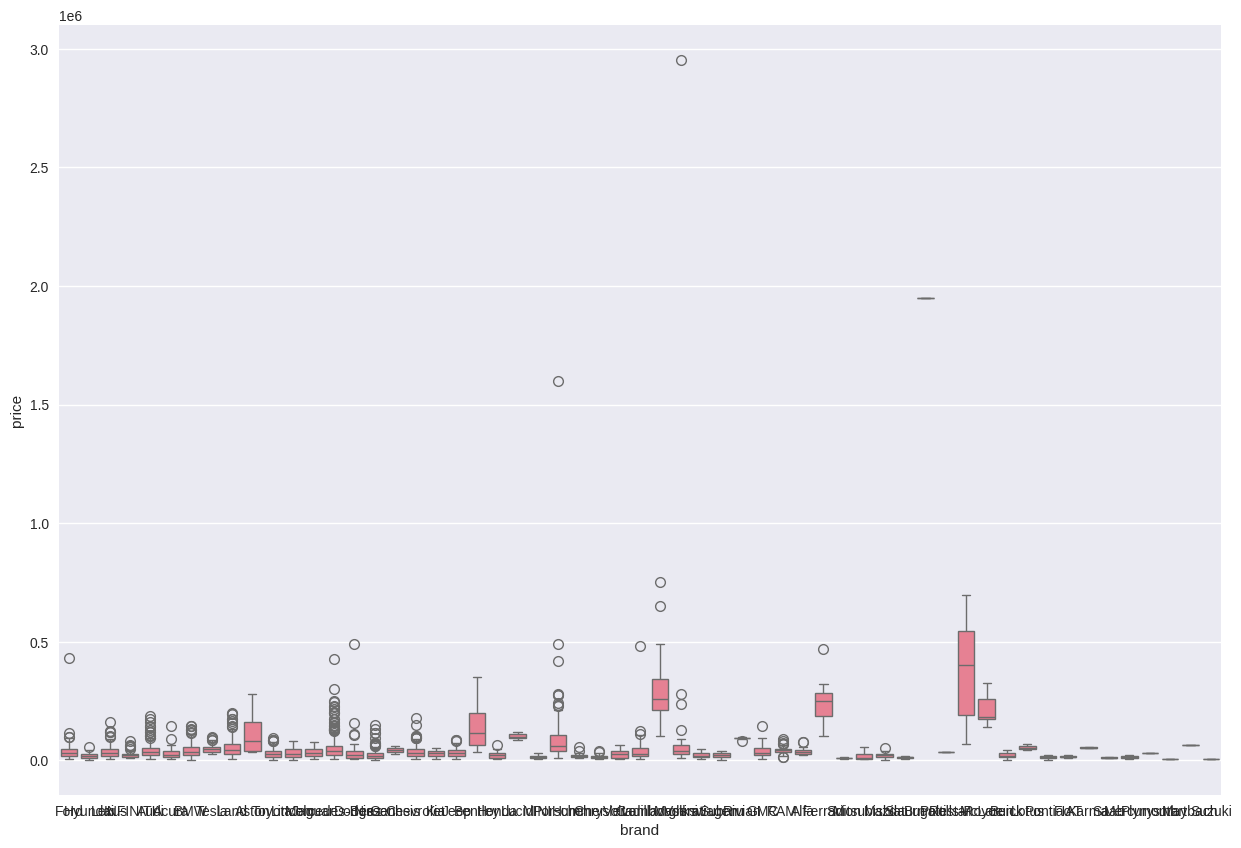

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='brand',y='price',data=df)

In [ ]:
def encode_column_based_on_price(Dframe, x):
    encode_to_num = {}
    val = 0
    for i in Dframe.groupby(x)[["price"]].median().sort_values(["price"], ascending = True).index:
        encode_to_num[i] = val
        val += 1
    print(val, "values encoded")
    return Dframe[x].map(encode_to_num), encode_to_num

In [ ]:
df["encoded_brand"], map_brand = encode_column_based_on_price(df, "brand")

57 values encoded


In [ ]:
df.shape

(4009, 13)

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,encoded_brand
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,33
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,12
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,29
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,16
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,35


In [ ]:
df['brand'].value_counts()

,count
brand,
Ford,386
BMW,375
Mercedes-Benz,315
Chevrolet,292
Porsche,201
Audi,200
Toyota,199
Lexus,163
Jeep,143


In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,encoded_brand
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,33
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,12
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,29
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,16
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,35


In [ ]:
df["encoded_model"], map_model = encode_column_based_on_price(df, "model")


1898 values encoded


In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,encoded_brand,encoded_model
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,33,265
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,12,1053
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,29,1514
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,16,465
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,35,1130


In [ ]:
df["encoded_model_year"], map_model_year = encode_column_based_on_price(df, "model_year")

34 values encoded


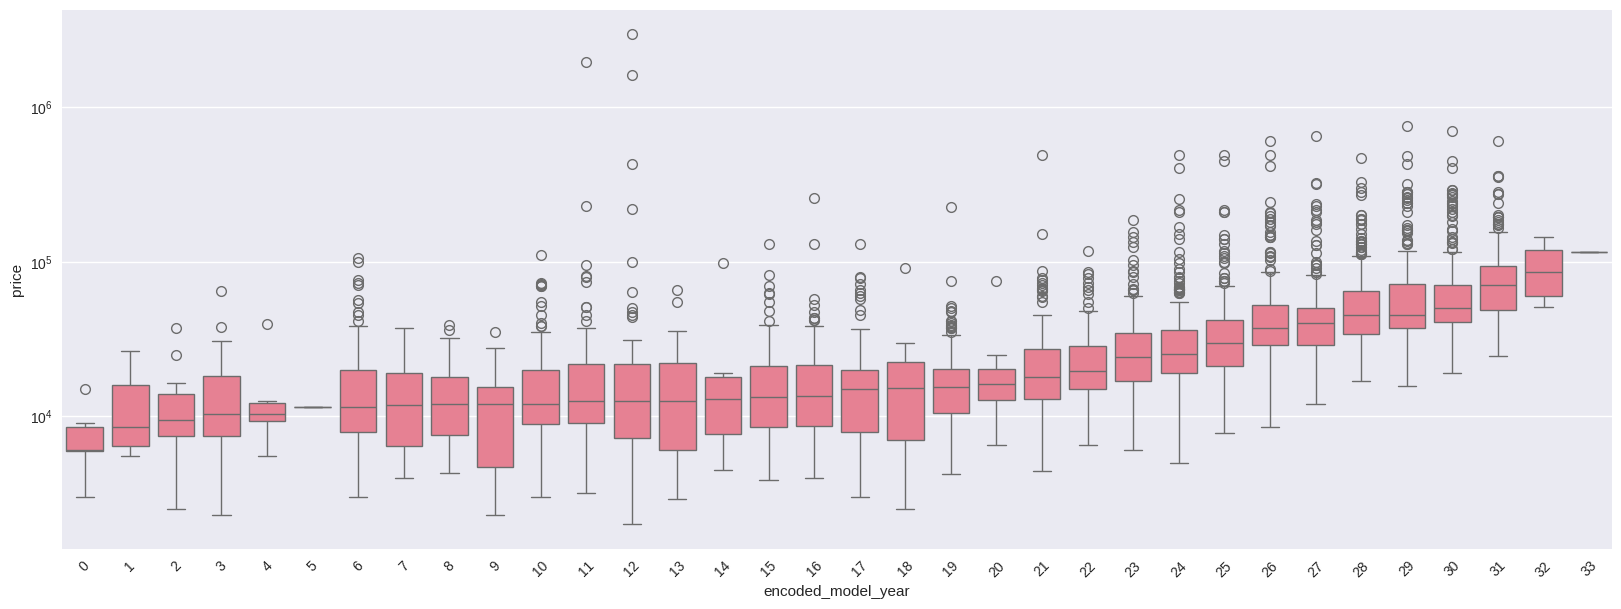

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(x="encoded_model_year", y = "price", data = df)
#plt.ylim(0, 0.2e6)
plt.xticks(rotation = 45)
plt.yscale("log")
plt.show()

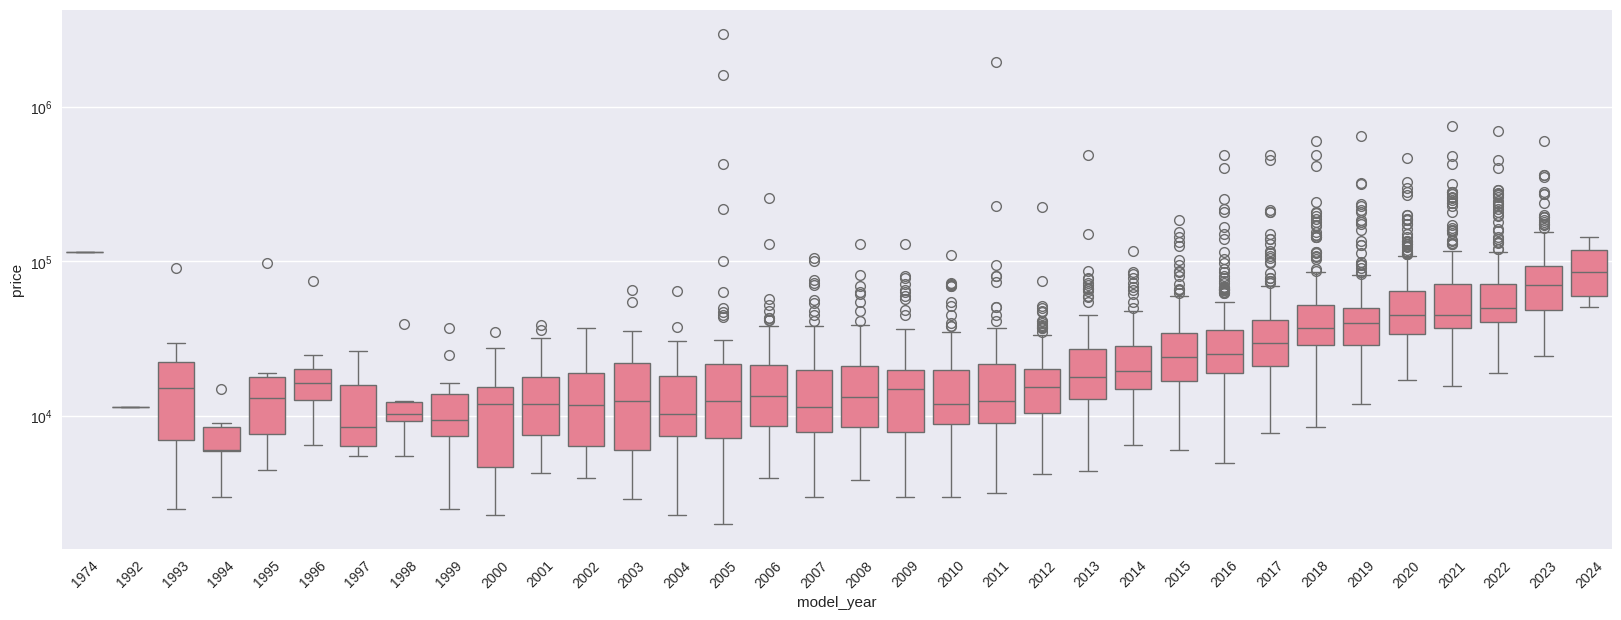

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(x="model_year", y = "price", data = df)
#plt.ylim(0, 0.2e6)
plt.xticks(rotation = 45)
plt.yscale("log")
plt.show()

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,encoded_brand,encoded_model,encoded_model_year
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,33,265,21
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,12,1053,29
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,29,1514,30
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,16,465,23
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,35,1130,29


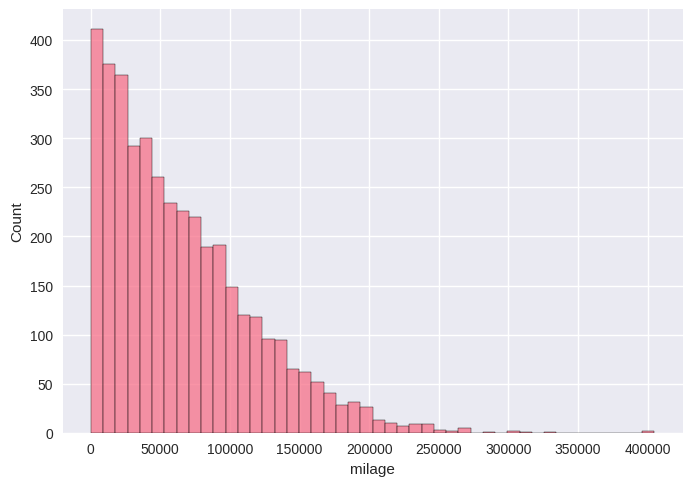

In [ ]:
sns.histplot(df['milage'])
plt.show()

In [ ]:
df.fuel_type.value_counts()

,count
fuel_type,
Gasoline,3309
Hybrid,194
E85 Flex Fuel,139
Diesel,116
–,45
Plug-In Hybrid,34
not supported,2


In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,encoded_brand,encoded_model,encoded_model_year
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,33,265,21
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,12,1053,29
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,29,1514,30
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,16,465,23
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,35,1130,29


In [ ]:
df.fuel_type.isna().sum()

np.int64(170)

In [ ]:
df["encoded_fuel_type"], map_fuel_type = encode_column_based_on_price(df, "fuel_type")

7 values encoded


In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,encoded_brand,encoded_model,encoded_model_year,encoded_fuel_type
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,33,265,21,2.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,12,1053,29,3.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,29,1514,30,3.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,16,465,23,6.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,35,1130,29,3.0


In [ ]:
df['fuel_type'].nunique()

7

In [ ]:
df["engine"].str.split()

,engine
0,"[300.0HP, 3.7L, V6, Cylinder, Engine, Flex, Fu..."
1,"[3.8L, V6, 24V, GDI, DOHC]"
2,"[3.5, Liter, DOHC]"
3,"[354.0HP, 3.5L, V6, Cylinder, Engine, Gas/Elec..."
4,"[2.0L, I4, 16V, GDI, DOHC, Turbo]"
...,...
4004,"[6.0L, W12, 48V, PDI, DOHC, Twin, Turbo]"
4005,"[349.0HP, 3.0L, V6, Cylinder, Engine, Gasoline..."
4006,[Electric]
4007,"[450.0HP, 3.5L, V6, Cylinder, Engine, Gasoline..."


In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,encoded_brand,encoded_model,encoded_model_year,encoded_fuel_type
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,33,265,21,2.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,12,1053,29,3.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,29,1514,30,3.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,16,465,23,6.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,35,1130,29,3.0


In [ ]:
df.transmission.value_counts()

,count
transmission,
A/T,1037
8-Speed A/T,406
Transmission w/Dual Shift Mode,398
6-Speed A/T,362
6-Speed M/T,248
...,...
10-Speed Automatic with Overdrive,1
9-Speed Automatic with Auto-Shift,1
SCHEDULED FOR OR IN PRODUCTION,1


In [ ]:


# Function to extract structured information from the engine column
def parse_engine(engine):
    if not isinstance(engine, str):  # Handle cases where data might not be a string
        return None, None, None, None, None, None

    parts = engine.split()
    hp, liters, cylinders, is_straight, is_flat, fuel_type = None, None, None, 0, 0, None

    for i, part in enumerate(parts):
        if "HP" in part:
            hp = float(part.replace("HP", ""))
        elif "L" in part and part[0].isdigit():
            liters = float(part.replace("L", ""))
        elif part in ["I4", "V6", "V8", "W12", "Flat", "Straight"]:
            cylinders = part
        elif part == "Straight":
            is_straight = 1
        elif part == "Flat":
            is_flat = 1
        elif part in ["Gasoline", "Diesel", "Electric", "Flex", "Hybrid"]:
            fuel_type = part

    return hp, liters, cylinders, is_straight, is_flat, fuel_type

# Apply function and create new columns
df[['HP', 'Liters', 'Cylinders', 'Straight', 'Flat', 'Fuel_Type']] = df['engine'].apply(parse_engine).apply(pd.Series)

# Display processed DataFrame
df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,encoded_brand,encoded_model,encoded_model_year,encoded_fuel_type,HP,Liters,Cylinders,Straight,Flat,Fuel_Type
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,33,265,21,2.0,300.0,3.7,V6,0.0,0.0,Flex
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,12,1053,29,3.0,NaN,3.8,V6,0.0,0.0,None
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,29,1514,30,3.0,NaN,NaN,NaN,0.0,0.0,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,16,465,23,6.0,354.0,3.5,V6,0.0,0.0,Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,35,1130,29,3.0,NaN,2.0,I4,0.0,0.0,None


In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,encoded_brand,encoded_model,encoded_model_year,encoded_fuel_type,HP,Liters,Cylinders,Straight,Flat,Fuel_Type
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,33,265,21,2.0,300.0,3.7,V6,0.0,0.0,Flex
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,12,1053,29,3.0,NaN,3.8,V6,0.0,0.0,None
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,29,1514,30,3.0,NaN,NaN,NaN,0.0,0.0,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,16,465,23,6.0,354.0,3.5,V6,0.0,0.0,Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,35,1130,29,3.0,NaN,2.0,I4,0.0,0.0,None


In [ ]:
def get_gear_type(transmission):
    if 'A/T' in transmission or 'Automatic' in transmission or "At" in transmission:
        if 'M/T' in transmission or 'Manual' in transmission or "Mt" in transmission:
            return 3  # Both
        return 1  # Automatic
    elif 'M/T' in transmission or 'Manual' in transmission or "Mt" in transmission:
        return 2  # Manual
    return 0  # Anything else

# Define function to extract speed value
def get_speed_value(transmission):
    import re
    match = re.search(r'\d+-Speed', transmission)
    if match:
        return float(match.group().split('-')[0])
    if "Speed" in transmission:
        val = transmission.split("Speed")
        if val[0] == "Single-":
            return 1
        return float(val[0])
    if "Spd" in transmission:
        match = re.search(r'\d+-Spd', transmission)
        if match:
            return float(match.group().split('-')[0])
    return np.nan

# Define function to extract specific transmission types
def get_transmission_type(transmission):
    if 'CVT' in transmission:
        return 1
    elif 'Dual Shift Mode' in transmission:
        return 2
    elif 'Overdrive' in transmission:
        return 3
    else:
        return 0

# Apply functions to DataFrame
df['gear_type'] = df['transmission'].apply(get_gear_type)
df['speed_value'] = df['transmission'].apply(get_speed_value)
df['transmission_type'] = df['transmission'].apply(get_transmission_type)

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,encoded_fuel_type,HP,Liters,Cylinders,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,2.0,300.0,3.7,V6,0.0,0.0,Flex,1,6.0,0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,3.0,NaN,3.8,V6,0.0,0.0,None,1,8.0,0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,3.0,NaN,NaN,NaN,0.0,0.0,NaN,1,NaN,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,6.0,354.0,3.5,V6,0.0,0.0,Hybrid,1,7.0,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,3.0,NaN,2.0,I4,0.0,0.0,None,1,8.0,0


In [ ]:


from sklearn.impute import SimpleImputer

freq_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["speed_value"] = freq_imputer.fit_transform(df[["speed_value"]])


In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,encoded_fuel_type,HP,Liters,Cylinders,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,2.0,300.0,3.7,V6,0.0,0.0,Flex,1,6.0,0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,3.0,NaN,3.8,V6,0.0,0.0,None,1,8.0,0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,3.0,NaN,NaN,NaN,0.0,0.0,NaN,1,6.0,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,6.0,354.0,3.5,V6,0.0,0.0,Hybrid,1,7.0,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,3.0,NaN,2.0,I4,0.0,0.0,None,1,8.0,0


In [ ]:
df_temp = df["ext_col"].value_counts()[df["ext_col"].value_counts()> 15]
df_temp

,count
ext_col,
Black,905
White,816
Gray,496
Silver,374
Blue,349
Red,261
Green,74
Brown,43
Gold,42


In [ ]:
filtered_df = df[df['ext_col'].isin(df_temp.index)].copy()

In [ ]:
filtered_df["encode_ext_col"], _ = encode_column_based_on_price(filtered_df, "ext_col")

12 values encoded


In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,encoded_fuel_type,HP,Liters,Cylinders,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,2.0,300.0,3.7,V6,0.0,0.0,Flex,1,6.0,0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,3.0,NaN,3.8,V6,0.0,0.0,None,1,8.0,0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,3.0,NaN,NaN,NaN,0.0,0.0,NaN,1,6.0,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,6.0,354.0,3.5,V6,0.0,0.0,Hybrid,1,7.0,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,3.0,NaN,2.0,I4,0.0,0.0,None,1,8.0,0


In [ ]:
df["encoded_int_col"], map_int_coe_column_based_on_price(df, "int_col")l = encod

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (ipython-input-2843135246.py, line 1)

In [ ]:

import re

# Function to check if a string is numeric
def is_numeric(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

# Function to extract engine details
def split_engine(x):
    if not isinstance(x, str):  # Handle missing values
        return np.nan, np.nan, 0, 0, 0

    vals = x.split()

    hp, liters, is_cyl, is_straight, is_flat = np.nan, np.nan, 0, 0, 0

    for i in range(len(vals)):
        # Extract HP
        if "HP" in vals[i]:
            try:
                hp = float(vals[i].replace("HP", ""))
            except ValueError:
                hp = np.nan

        # Extract Liters
        if "L" in vals[i] and is_numeric(vals[i].replace("L", "")):
            try:
                liters = float(vals[i].replace("L", ""))
            except ValueError:
                liters = np.nan

        # Check if Cylinder, Straight, or Flat
        if "Cylinder" in vals[i]:
            is_cyl = 1
        if "Straight" in vals[i]:
            is_straight = 1
        if "Flat" in vals[i]:
            is_flat = 1

    return hp, liters, is_cyl, is_straight, is_flat

# Apply the function to extract engine details
df[["HP", "Liters", "Cylinder", "Straight", "Flat"]] = df["engine"].apply(split_engine).apply(pd.Series)

# Display processed DataFrame
df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,HP,Liters,Cylinders,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type,Cylinder
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,300.0,3.7,V6,0.0,0.0,Flex,1,6.0,0,1.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,NaN,3.8,V6,0.0,0.0,None,1,8.0,0,0.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,NaN,NaN,NaN,0.0,0.0,NaN,1,6.0,0,0.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,354.0,3.5,V6,0.0,0.0,Hybrid,1,7.0,0,1.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,NaN,2.0,I4,0.0,0.0,None,1,8.0,0,0.0


In [ ]:
df.accident.value_counts()

,count
accident,
None reported,2910
At least 1 accident or damage reported,986


In [ ]:
map_accident = {"None reported": 0, "At least 1 accident or damage reported": 1}
df["encoded_accident"] = df["accident"].map(map_accident)

In [ ]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,Liters,Cylinders,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type,Cylinder,encoded_accident
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,3.7,V6,0.0,0.0,Flex,1,6.0,0,1.0,1.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,3.8,V6,0.0,0.0,None,1,8.0,0,0.0,1.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,NaN,NaN,0.0,0.0,NaN,1,6.0,0,0.0,0.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,3.5,V6,0.0,0.0,Hybrid,1,7.0,0,1.0,0.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,2.0,I4,0.0,0.0,None,1,8.0,0,0.0,0.0


In [ ]:
df.clean_title.value_counts()

,count
clean_title,
Yes,3413


In [ ]:
len(df)

4009

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,Liters,Cylinders,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type,Cylinder,encoded_accident
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,3.7,V6,0.0,0.0,Flex,1,6.0,0,1.0,1.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,3.8,V6,0.0,0.0,None,1,8.0,0,0.0,1.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,NaN,NaN,0.0,0.0,NaN,1,6.0,0,0.0,0.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,3.5,V6,0.0,0.0,Hybrid,1,7.0,0,1.0,0.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,2.0,I4,0.0,0.0,None,1,8.0,0,0.0,0.0


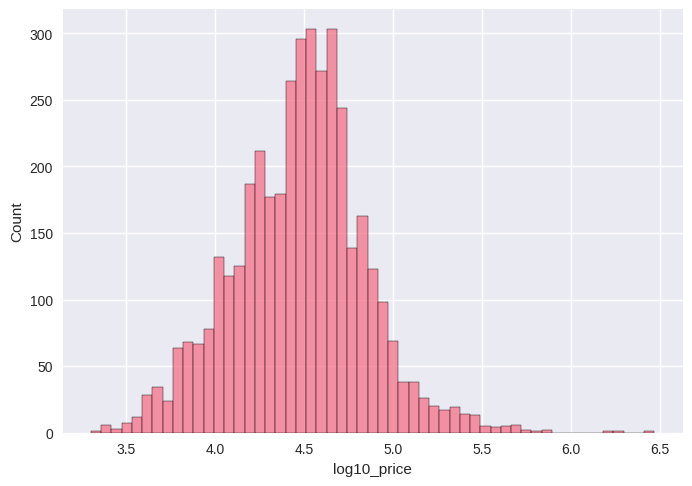

In [ ]:
df["log10_price"] = np.log10(df.price)
sns.histplot(df.log10_price)
plt.show()

In [ ]:
varsel = [ "encoded_brand", "encoded_model", "model_year", "encoded_model_year", "log10_milage", "encoded_fuel_type",
        "HP", "Liters", "Cylinder", "Straight",
        "Flat", "gear_type", "transmission_type", "speed_value",
        "encoded_ext_col", "encoded_accident", "log10_price"]

In [ ]:
varsel

['encoded_brand',
 'encoded_model',
 'model_year',
 'encoded_model_year',
 'log10_milage',
 'encoded_fuel_type',
 'HP',
 'Liters',
 'Cylinder',
 'Straight',
 'Flat',
 'gear_type',
 'transmission_type',
 'speed_value',
 'encoded_ext_col',
 'encoded_accident',
 'log10_price']

In [ ]:
filtered_df = df[df['ext_col'].isin(df_temp.index)].copy()
filtered_df["encode_ext_col"], _ = encode_column_based_on_price(filtered_df, "ext_col")

12 values encoded


In [ ]:
df["encoded_ext_col"], map_ext_col = encode_column_based_on_price(df, "ext_col")

319 values encoded


In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type,Cylinder,encoded_accident,log10_price,encoded_ext_col
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,0.0,0.0,Flex,1,6.0,0,1.0,1.0,4.012837,77
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,0.0,0.0,None,1,8.0,0,0.0,1.0,4.579841,135
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,0.0,0.0,NaN,1,6.0,0,0.0,0.0,4.737177,69
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,0.0,0.0,Hybrid,1,7.0,0,1.0,0.0,4.190332,77
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,0.0,0.0,None,1,8.0,0,0.0,0.0,4.544056,110


In [ ]:
df["log10_milage"] = np.log10(df["milage"])

In [ ]:
df_sel = df[varsel].copy()

In [ ]:
df_sel.head()

,encoded_brand,encoded_model,model_year,encoded_model_year,log10_milage,encoded_fuel_type,HP,Liters,Cylinder,Straight,Flat,gear_type,transmission_type,speed_value,encoded_ext_col,encoded_accident,log10_price
0,33,265,2013,21,4.707570,2.0,300.0,3.7,1.0,0.0,0.0,1,0,6.0,77,1.0,4.012837
1,12,1053,2021,29,4.540855,3.0,NaN,3.8,0.0,0.0,0.0,1,0,8.0,135,1.0,4.579841
2,29,1514,2022,30,4.349705,3.0,NaN,NaN,0.0,0.0,0.0,1,0,6.0,69,0.0,4.737177
3,16,465,2015,23,4.948902,6.0,354.0,3.5,1.0,0.0,0.0,1,0,7.0,77,0.0,4.190332
4,35,1130,2021,29,3.992774,3.0,NaN,2.0,0.0,0.0,0.0,1,0,8.0,110,0.0,4.544056


In [ ]:
corr = df_sel.corr()

In [ ]:
from google.colab import files
df_sel.to_csv('df_sel.csv', index=False)
files.download('df_sel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
corr

,encoded_brand,encoded_model,model_year,encoded_model_year,log10_milage,encoded_fuel_type,HP,Liters,Cylinder,Straight,Flat,gear_type,transmission_type,speed_value,encoded_ext_col,encoded_accident,log10_price
encoded_brand,1.000000,0.505085,0.171301,0.167916,-0.241879,0.071695,0.453996,0.212968,-0.106179,0.089604,0.225533,-0.066648,0.006922,0.068880,0.172579,-0.111466,0.493294
encoded_model,0.505085,1.000000,0.597439,0.593604,-0.613055,0.169272,0.682662,0.305099,-0.255930,0.022841,0.151972,-0.070105,0.028921,0.240766,0.319842,-0.264757,0.906674
model_year,0.171301,0.597439,1.000000,0.922337,-0.575395,0.216649,0.305127,-0.103668,-0.335213,-0.039254,-0.074708,-0.186357,0.021185,0.301962,0.281214,-0.199087,0.625215
encoded_model_year,0.167916,0.593604,0.922337,1.000000,-0.552676,0.168430,0.290870,-0.099546,-0.355172,-0.038346,-0.071050,-0.176767,0.017495,0.291434,0.277701,-0.202328,0.625507
log10_milage,-0.241879,-0.613055,-0.575395,-0.552676,1.000000,-0.140236,-0.382340,-0.000763,0.304558,0.000529,-0.047705,0.011709,0.011863,-0.162718,-0.287171,0.289717,-0.687224
encoded_fuel_type,0.071695,0.169272,0.216649,0.168430,-0.140236,1.000000,-0.020620,-0.052059,0.044984,0.159069,-0.031796,-0.079635,0.023546,0.049937,0.047606,-0.036568,0.153950
HP,0.453996,0.682662,0.305127,0.290870,-0.382340,-0.020620,1.000000,0.638429,-0.212743,0.002137,0.058709,-0.096624,0.095145,0.138871,0.126730,-0.131342,0.669584
Liters,0.212968,0.305099,-0.103668,-0.099546,-0.000763,-0.052059,0.638429,1.000000,0.049292,-0.075020,-0.034097,-0.013888,-0.041357,0.014284,0.098142,-0.002464,0.275141
Cylinder,-0.106179,-0.255930,-0.335213,-0.355172,0.304558,0.044984,-0.212743,0.049292,1.000000,0.140761,0.086987,-0.048541,0.162282,0.025171,-0.460283,0.171225,-0.274370
Straight,0.089604,0.022841,-0.039254,-0.038346,0.000529,0.159069,0.002137,-0.075020,0.140761,1.000000,-0.039700,0.014665,0.037805,0.015497,-0.049065,-0.013573,0.007847


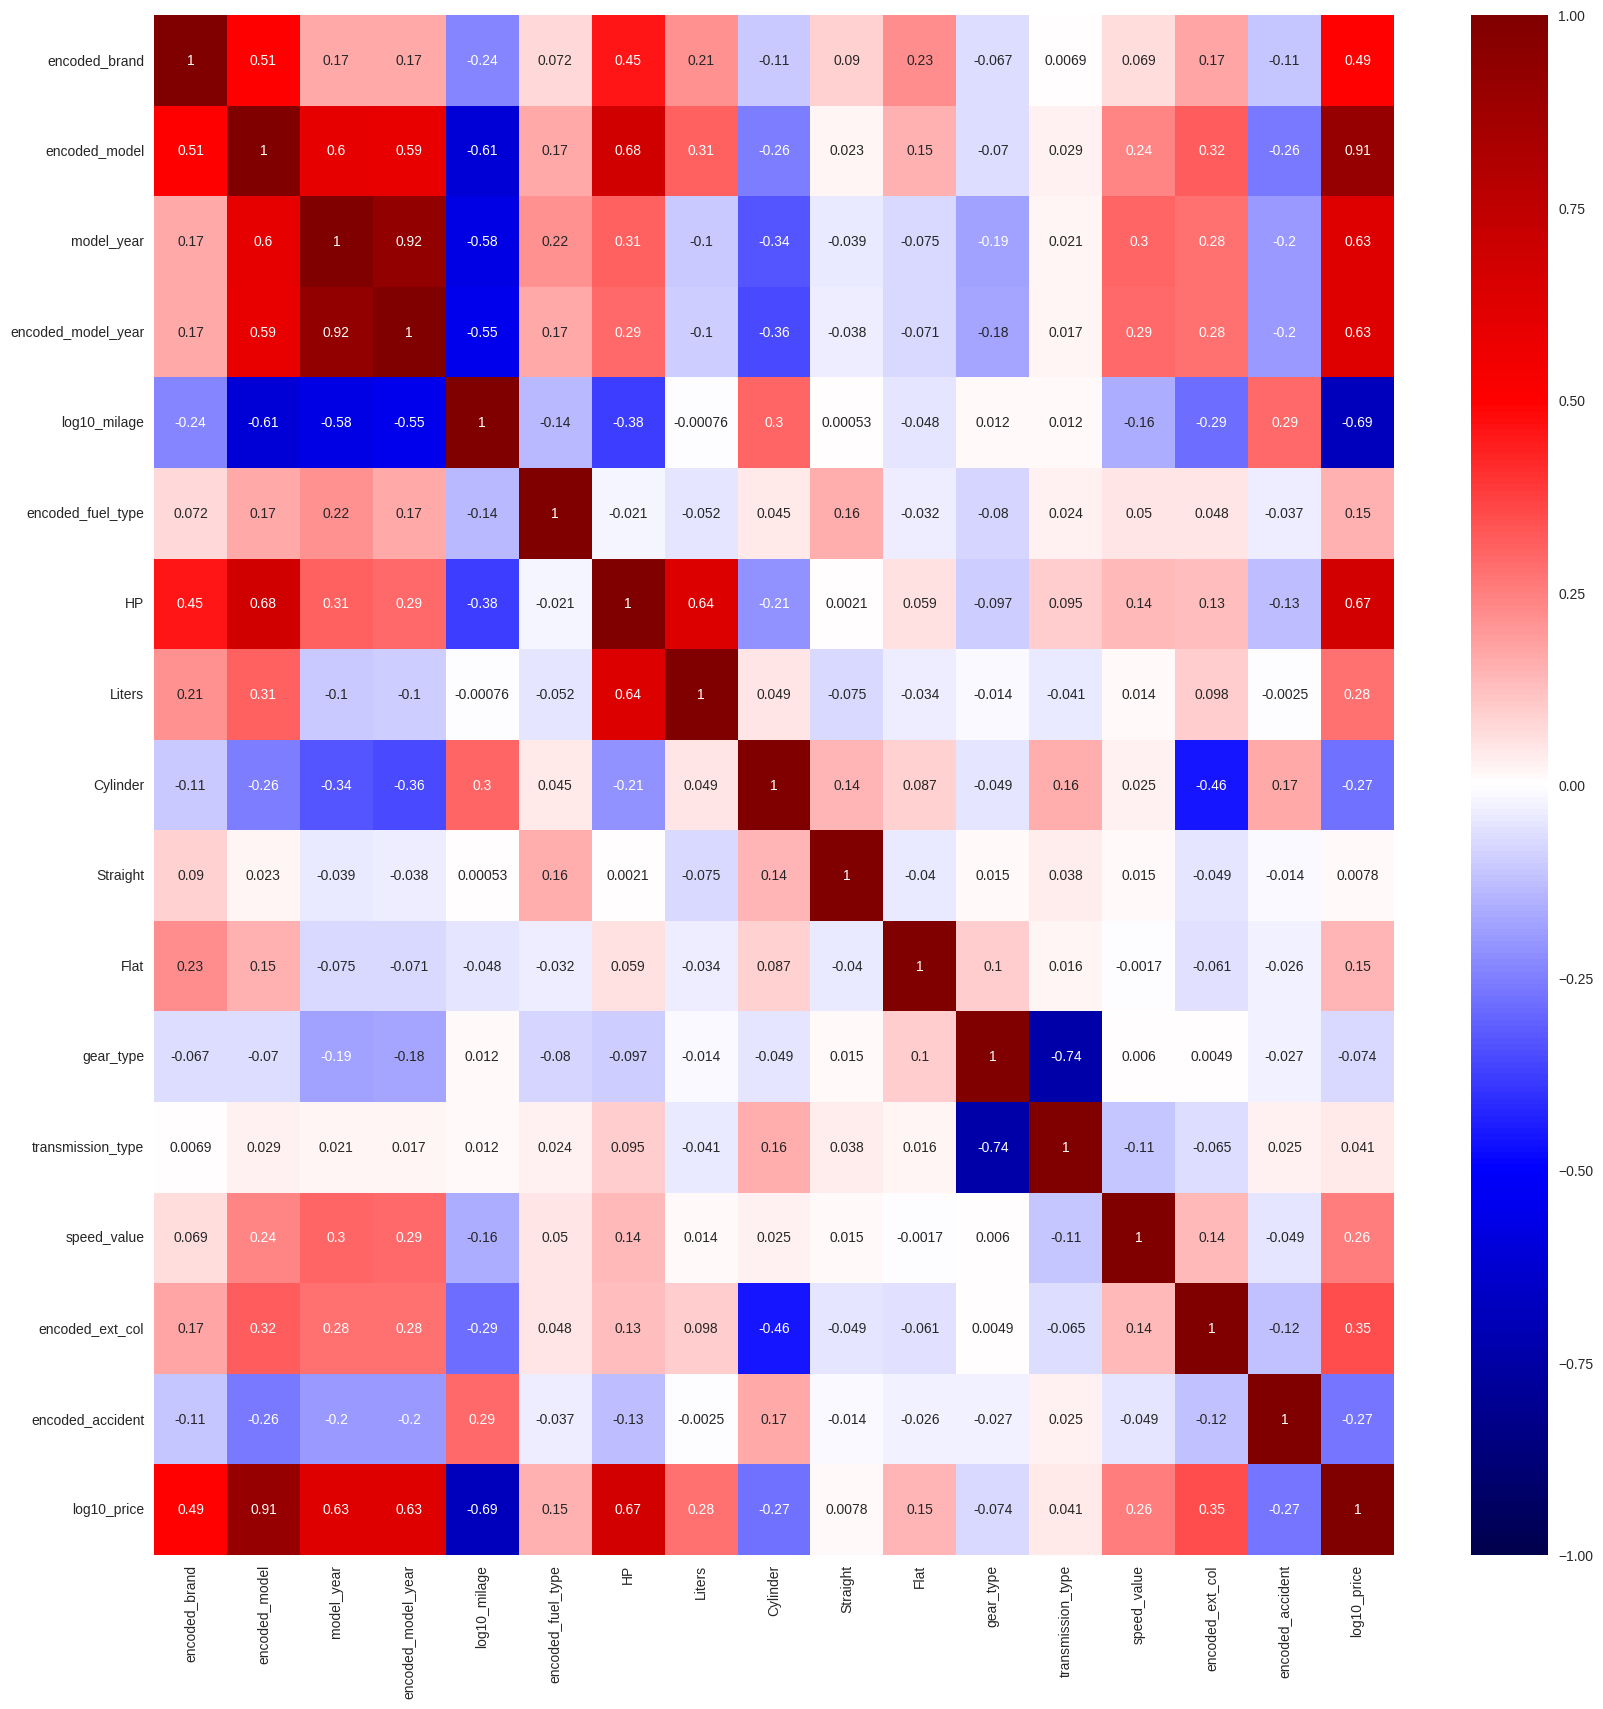

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="seismic", vmin=-1, vmax = 1)
plt.show()

In [ ]:
df_sel.isnull().sum()

,0
encoded_brand,0
encoded_model,0
model_year,0
encoded_model_year,0
log10_milage,0
encoded_fuel_type,170
HP,808
Liters,377
Cylinder,0
Straight,0


In [ ]:
from sklearn.impute import SimpleImputer
freq_imputer = SimpleImputer(strategy = "median")

In [ ]:
df_sel["encoded_fuel_type"] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df_sel["encoded_fuel_type"])))

In [ ]:
df_sel["HP"] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df_sel["HP"])))
df_sel["Liters"] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df_sel["Liters"])))


In [ ]:
df_sel.isnull().sum()

,0
encoded_brand,0
encoded_model,0
model_year,0
encoded_model_year,0
log10_milage,0
encoded_fuel_type,0
HP,0
Liters,0
Cylinder,0
Straight,0


In [ ]:
df_sel["encoded_accident"] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df_sel["encoded_accident"])))

In [ ]:
df_sel.isnull().sum()

,0
encoded_brand,0
encoded_model,0
model_year,0
encoded_model_year,0
log10_milage,0
encoded_fuel_type,0
HP,0
Liters,0
Cylinder,0
Straight,0
